In [2]:
#import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot  as plt
from IPython import display
display.set_matplotlib_formats('svg')


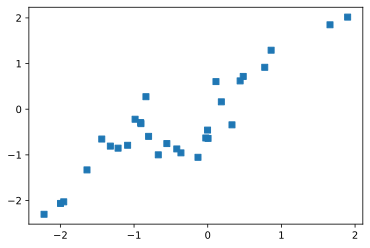

In [14]:
#create data
m = 1
N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

#and plot
plt.plot(x,y,'s')
plt.show()

In [5]:
#build model
ANNreg = nn.Sequential(
    nn.Linear(1,1), #input layer
    nn.ReLU(), # activation function
    nn.Linear(1,1) #output layer
)
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [6]:
#learning rate
learningrate = .05

#loss function
lossfun = nn.MSELoss()
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningrate)


In [7]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)

# Train the model
for epochi in range(numepochs):

    #forwardpass
    yhat = ANNreg(x)

    #final loss
    loss = lossfun(yhat,y)
    losses[epochi]=loss

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

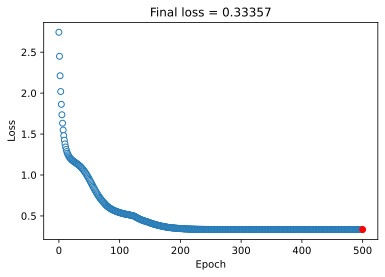

In [9]:

# manually compute losses
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [10]:
testloss.detach()

tensor(0.3336)

In [11]:
testloss.item()

0.33356964588165283

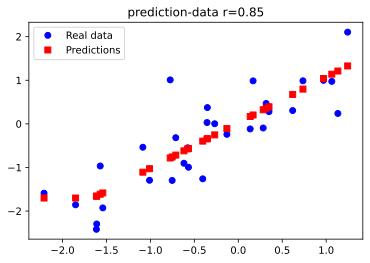

In [12]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()